## INTRODUCTION

#### OBJECTIVE

This case study aims to model the probability of attrition of each employee from the HR Analytics Dataset, available on Kaggle. Its conclusions will allow the management to understand which factors urge the employees to leave the company and which changes should be made to avoid their departure.

In [1]:
# Imporing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# lets now import the csv file using pandas
hr = pd.read_csv('turnover.csv')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


##### Lets start our analysis with basics of learning the data, understand meaning of variable and perform the necessary adjustments to ensure that the data will be proceeded correctly during the Machine Learning process.

In [3]:
# Shape of the data frame
print('Rows:', hr.shape[0], '| Columns:', hr.shape[1])

Rows: 14999 | Columns: 10


In [4]:
hr.info()
# we have 10 columns in total in which 2 columns are float, 6 int and 2 object variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


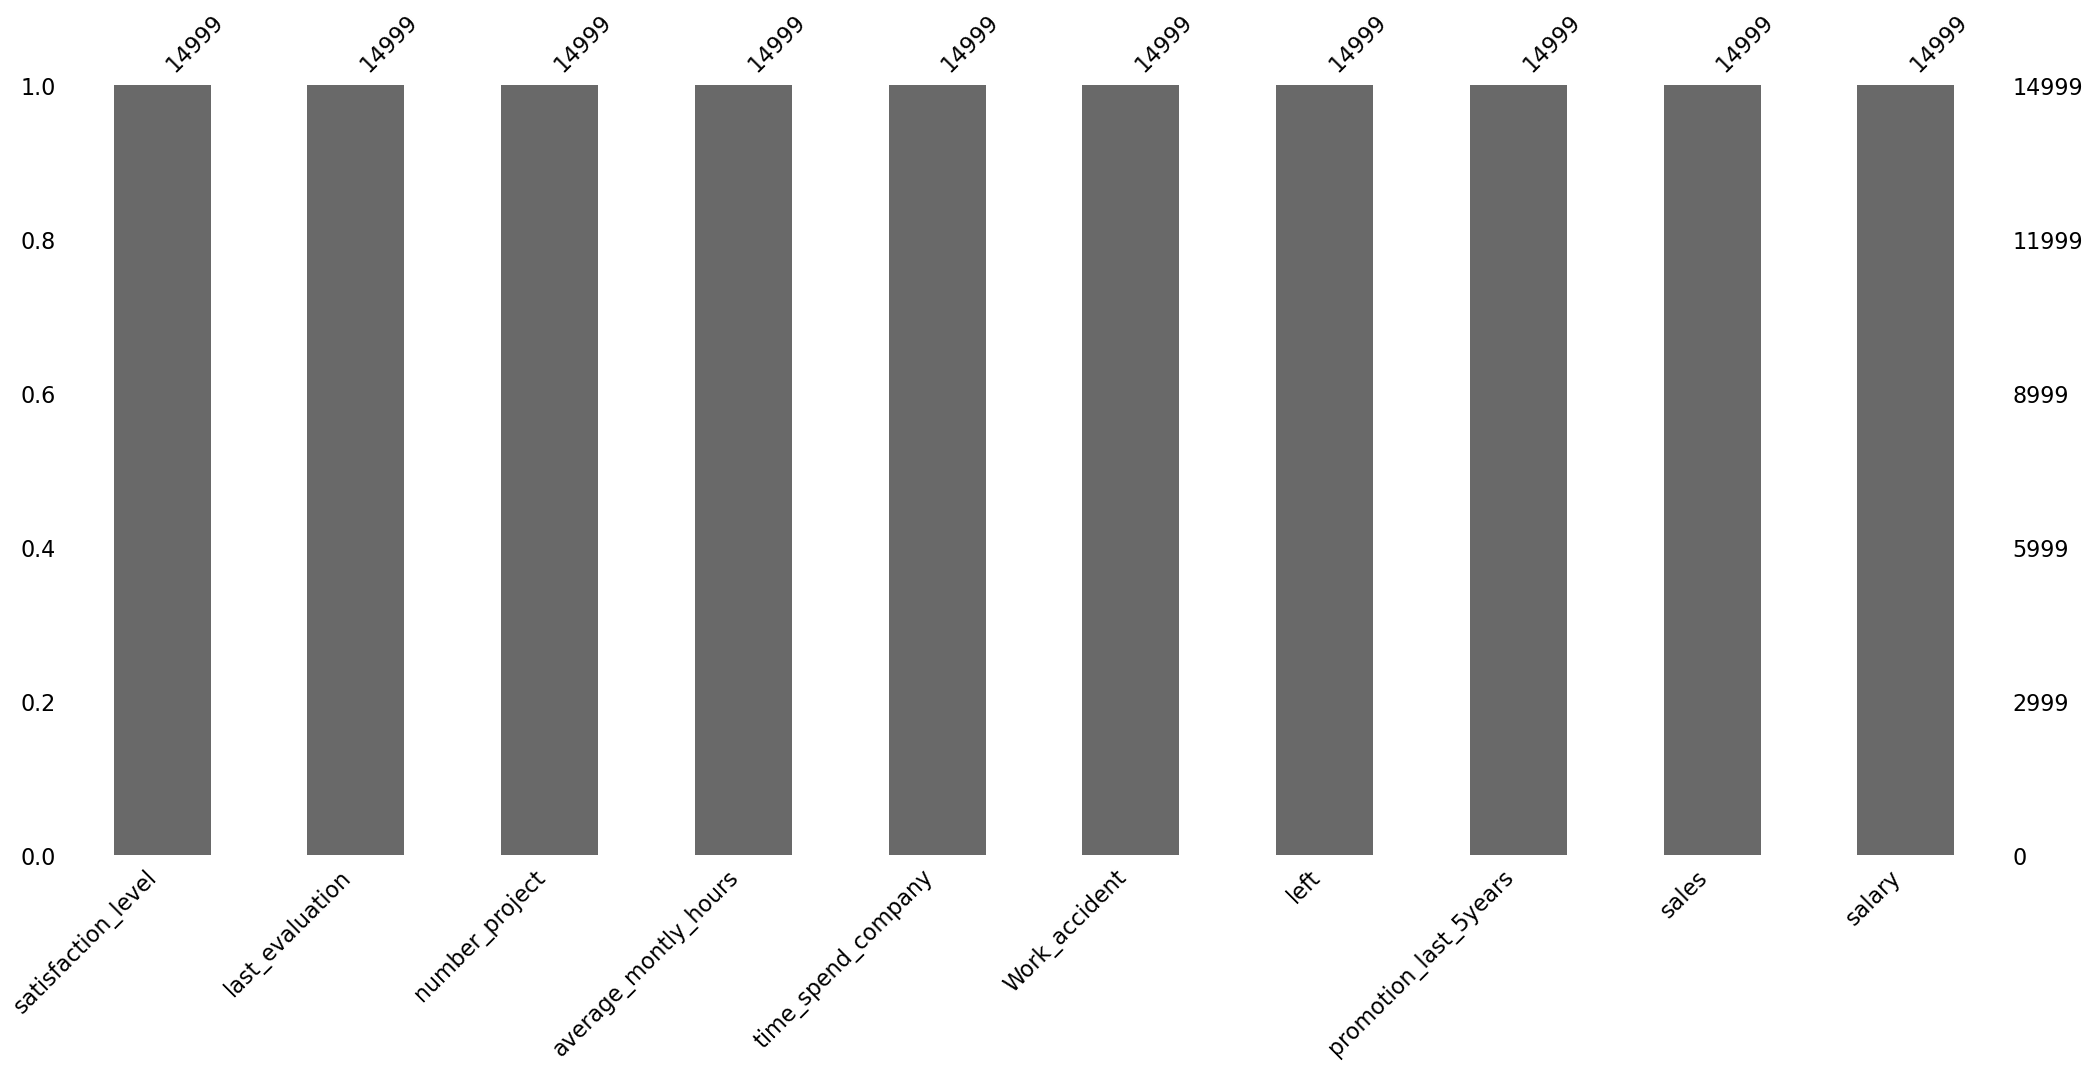

In [5]:
# Now lets check for any null values present in our data
print(hr.isnull().sum()*100)
import missingno as msno
msno.bar(hr)
plt.show()

In [6]:
# Starting good, We dont have any null values present in our data

In [7]:
hr.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [8]:
# lets now split the data to numerical and categorical to analyse futher
num = hr.select_dtypes(include= np.number).columns.to_list()
print(num)
print('-'*120)
cat = hr.select_dtypes(exclude= np.number).columns.to_list()
print(cat)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']
------------------------------------------------------------------------------------------------------------------------
['sales', 'salary']


In [9]:
for i in cat:
    print(f"The unique values in column {i}:")
    print(hr[i].unique())
    print('-'*120)

The unique values in column sales:
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
------------------------------------------------------------------------------------------------------------------------
The unique values in column salary:
['low' 'medium' 'high']
------------------------------------------------------------------------------------------------------------------------


In [10]:
# The variable sales seems to represent the company departments. Thus, it will be renamed as department.
hr = hr.rename(columns={'sales': 'department'})

In [11]:
cat = ['department', 'salary']

### Univariate analysis on numerical columns

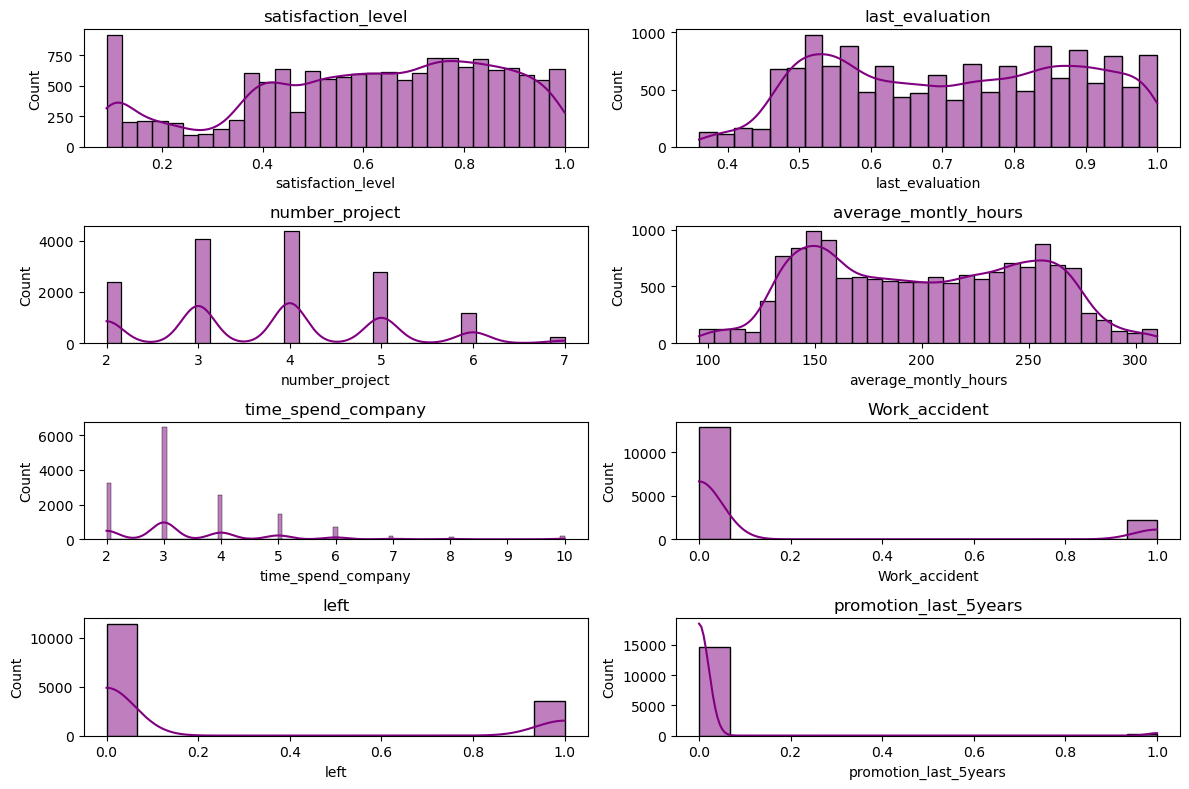

In [12]:
# lets check the distribution of our data by plotting a histogram on the numerical variables
plt.figure(figsize=(12,8))
t = 1
for i in num:
    plt.subplot(4,2,t)
    sns.histplot(x=hr[i],kde= True,color='purple')
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

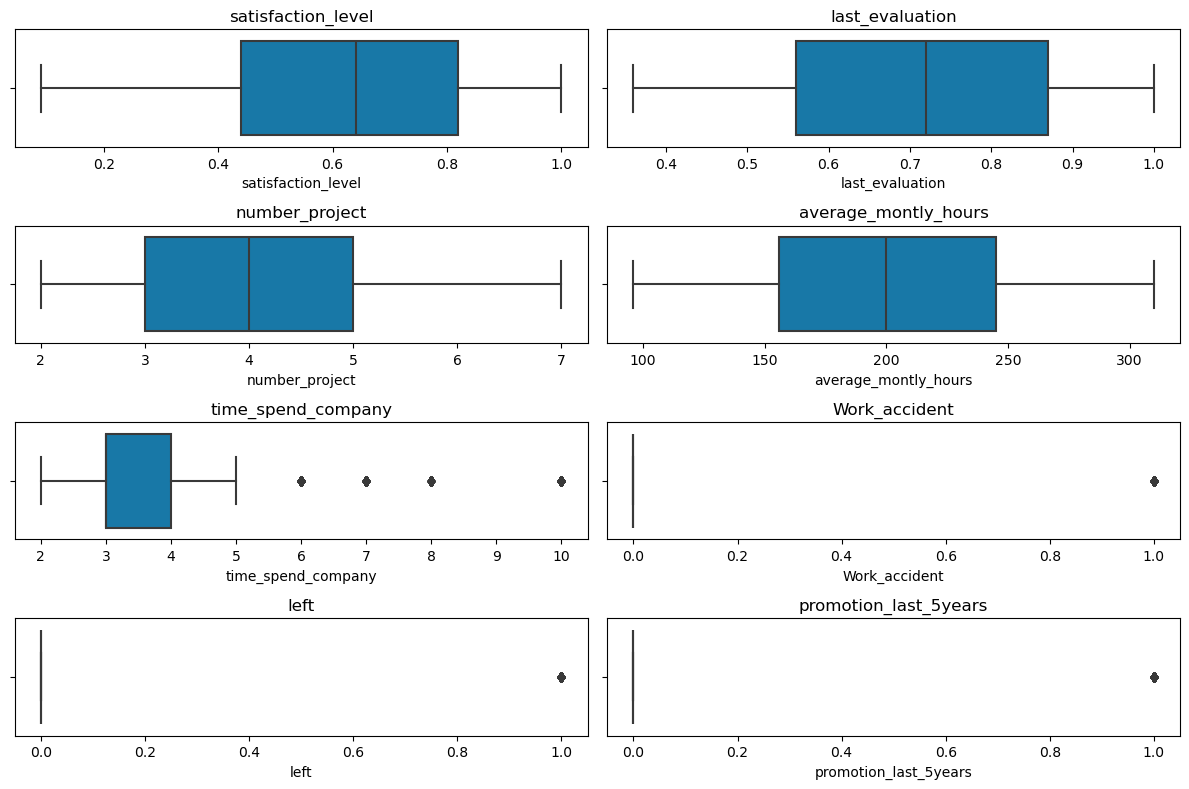

In [13]:
# Lets visualize for potential outliers
plt.figure(figsize=(12,8))
t=1
for i in num:
    plt.subplot(4,2,t)
    sns.boxplot(x= hr[i],palette= 'winter')
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

--> There are a few outliers at the higher end (tenure of 6–10 years), likely representing long-term employees.

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours         

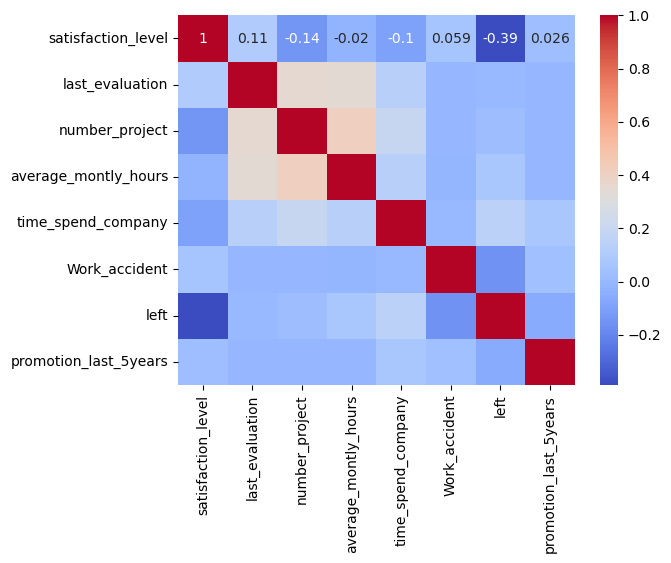

In [14]:
# Lets check the correlation among the features
print(hr[num].corr())
sns.heatmap(hr[num].corr(),annot= True,cmap = 'coolwarm',cbar= True)
plt.show()

In [15]:
hr[num].corr().T

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


### Univariate analysis on categorical columns

In [16]:
hr[cat].describe().T

,count,unique,top,freq
department,14999,10,sales,4140
salary,14999,3,low,7316


In [17]:
# Its evident that majority of the people are earning low, lets analyse further how the earning is affecting the attrition 

In [18]:
# Salary Levels proportions and turnover rates
print('Salary Levels proportions')
print(hr['salary'].value_counts()/len(hr)*100)
print('-'*120)
print('Turnover Rate by Salary level')
print(hr.groupby('salary')['left'].mean())

Salary Levels proportions
salary
low       48.776585
medium    42.976198
high       8.247216
Name: count, dtype: float64
------------------------------------------------------------------------------------------------------------------------
Turnover Rate by Salary level
salary
high      0.066289
low       0.296884
medium    0.204313
Name: left, dtype: float64


##### salary levels proportions indicates that the majority of employees are in the low to medium salary bands, while relatively fewer employees are in the high salary band.

#### The turnover rate suggests that employees with low salaries have the highest turnover rate at 29.69%, followed by medium salary employees at 20.43%. High salary employees show the lowest turnover rate at 6.63%.

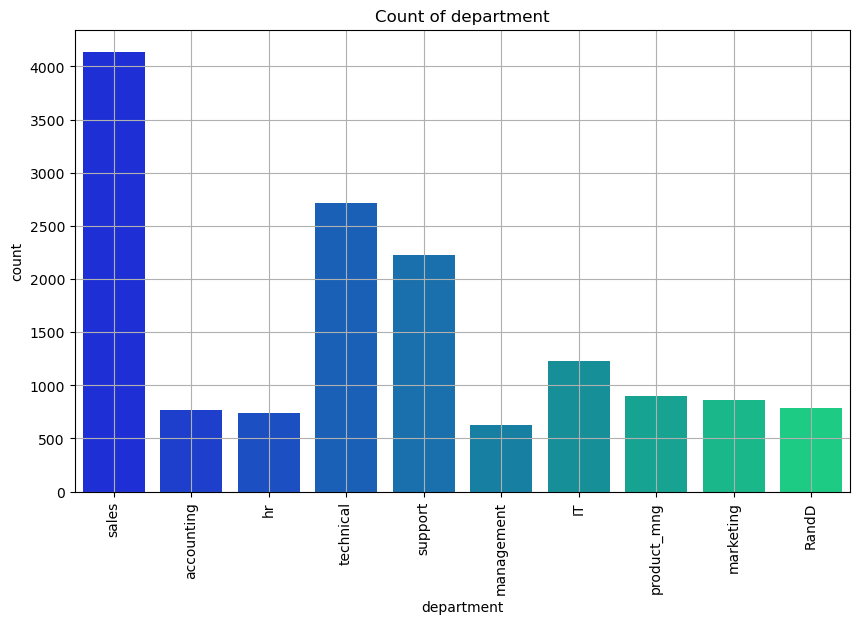

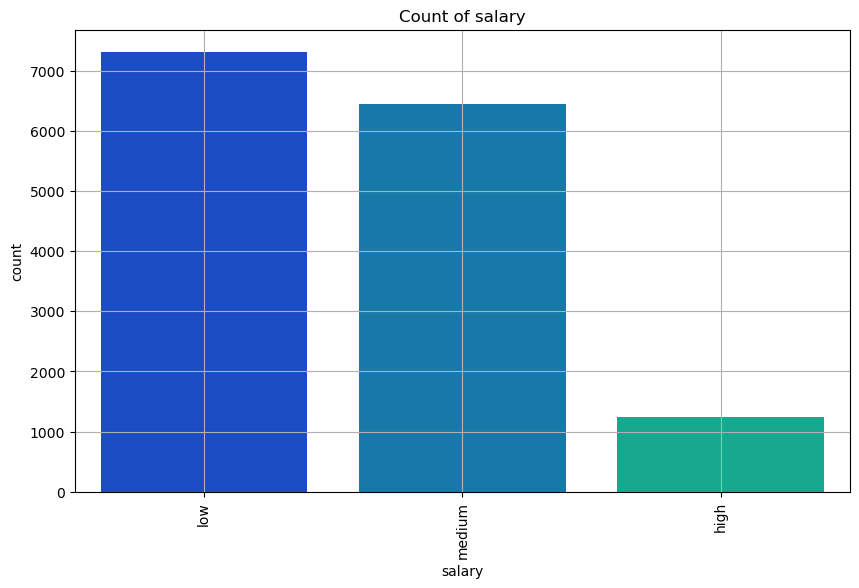

In [19]:
for i in cat:
    plt.figure(figsize=(10,6))
    sns.countplot(x= hr[i],palette='winter')
    plt.xticks(rotation =90)
    plt.title(f'Count of {i}')
    plt.grid()
    plt.show()

BIVARIATE ANALYSIS, LETS SEE HOW THE OTHER FEATURES RELATE WITH OUR TARGET VARIABLE (left)

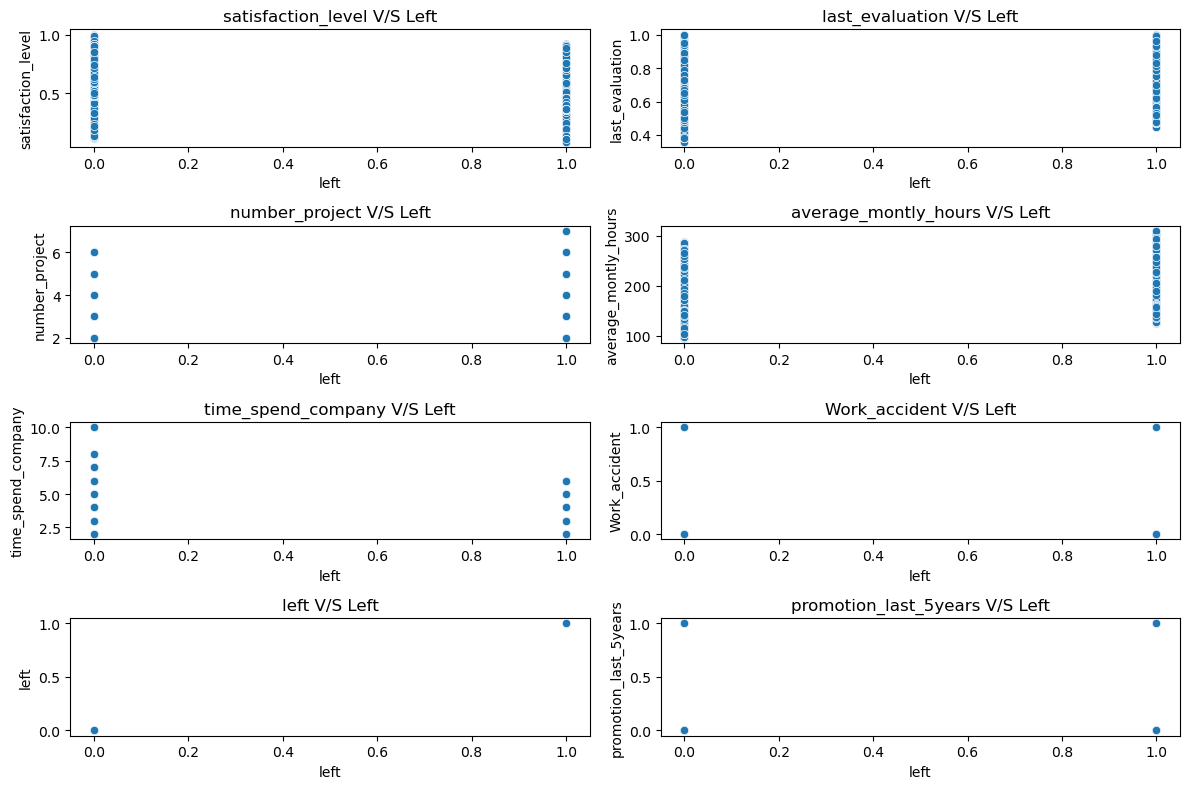

In [20]:
plt.figure(figsize=(12,8))
t=1
for i in num:
    plt.subplot(4,2,t)
    sns.scatterplot(y= hr[i], x= hr['left'])
    plt.title(f"{i} V/S Left")
    t+=1
plt.tight_layout()
plt.show()

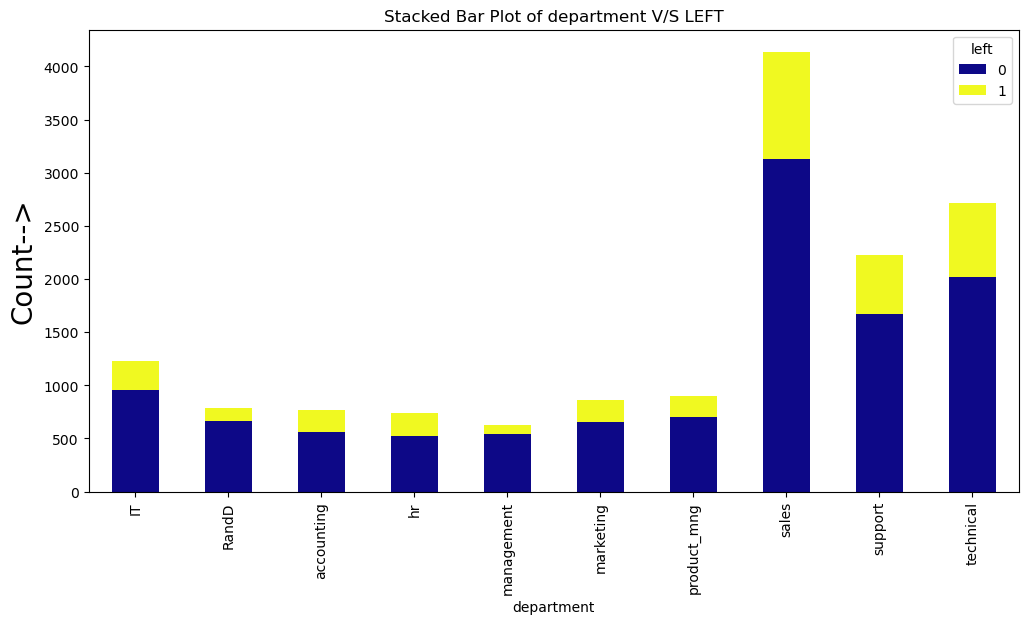

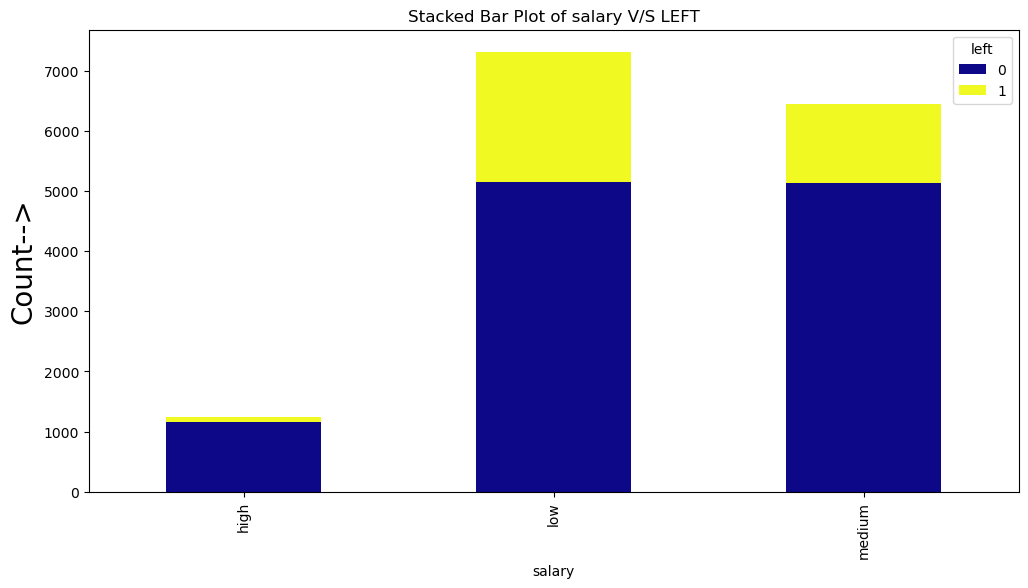

In [21]:
for i in cat:
    crosstab = pd.crosstab(hr[i],hr['left'])
    crosstab.plot(kind = 'bar',stacked = True,figsize = (12,6),cmap = 'plasma')
    plt.title(f'Stacked Bar Plot of {i} V/S LEFT')
    plt.ylabel('Count-->',fontsize = 20)
    plt.show()

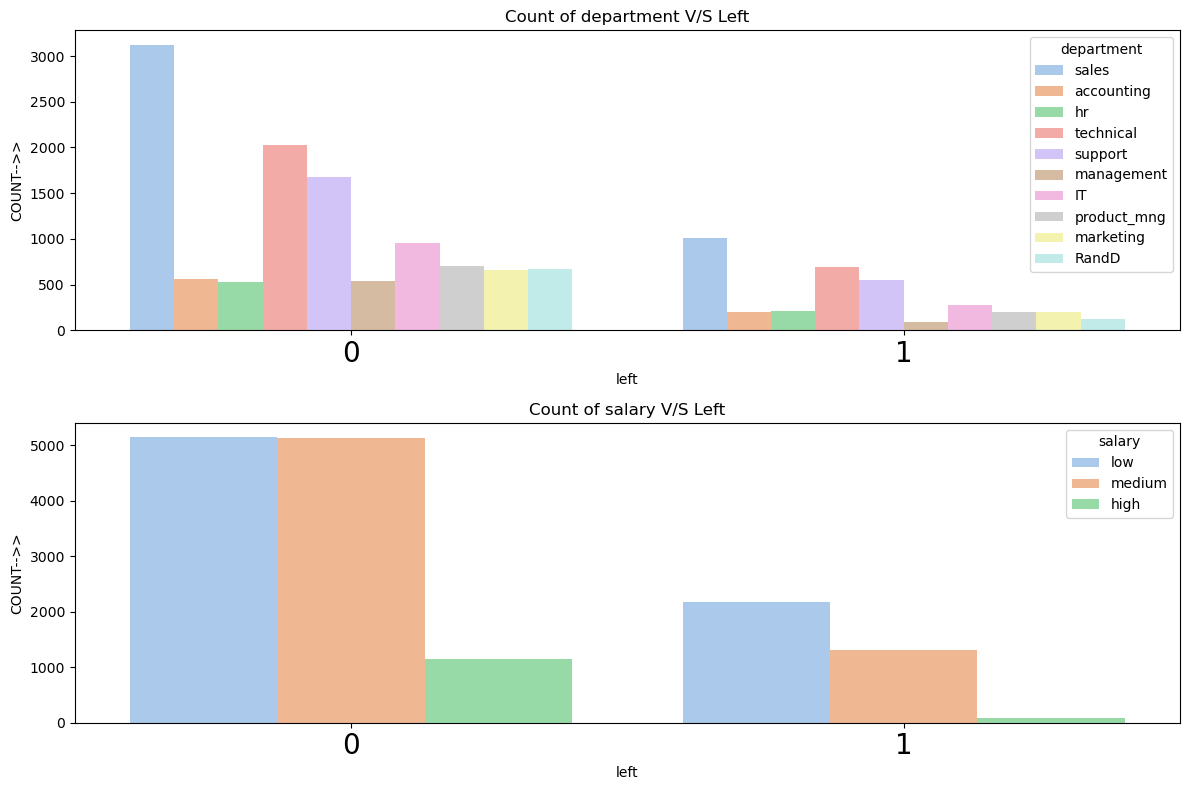

In [22]:
plt.rcParams['figure.figsize']= 12,8
t=1
for i in cat:
    plt.subplot(2,1,t)
    sns.countplot(hue = hr[i],x= hr['left'],palette= 'pastel')
    plt.title(f"Count of {i} V/S Left")
    plt.xticks(fontsize = 20)
    plt.ylabel('COUNT-->>')
    t+=1
plt.tight_layout()
plt.show()

### Lets analyse further to find the reason for attrition 

In [23]:
# Get the mean of each variable for the different values of left
hr.groupby('left').mean(numeric_only= True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Employees who left the company have:

- a lower satisfaction level: 0.44 vs 0.67.
- higher average monthly working hours: 207 vs 199.
- employees who stayed experienced more accidents
- employees who left had a significantly lower likelihood of recent promotions

left
0    11428
1     3571
Name: count, dtype: int64


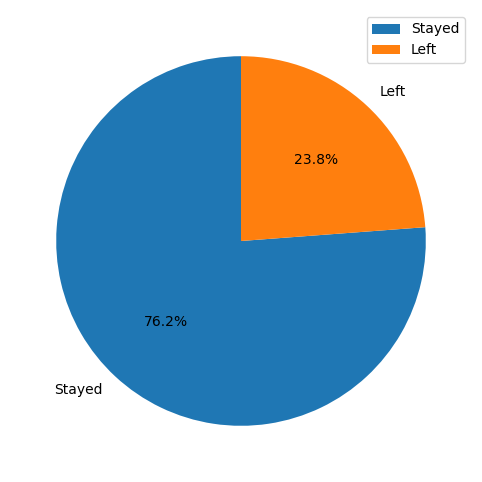

In [61]:
# Lets compare our target variable
plt.figure(figsize=(10,6))
print(hr['left'].value_counts())
plt.pie(hr['left'].value_counts(), autopct='%1.1f%%', startangle=90, labels=['Stayed', 'Left'])
plt.legend(['Stayed', 'Left'], loc='best')
plt.show()

In [62]:
# Our target variable looks severly imbalanced with 76% differance 
# with majority of people stayed back in the company
# Lets find out why the 24% people have left the company

## Lets try to understand which department had the most turnover rates

department
hr             0.290934
accounting     0.265971
technical      0.256250
support        0.248991
sales          0.244928
marketing      0.236597
IT             0.222494
product_mng    0.219512
RandD          0.153748
management     0.144444
Name: left, dtype: float64


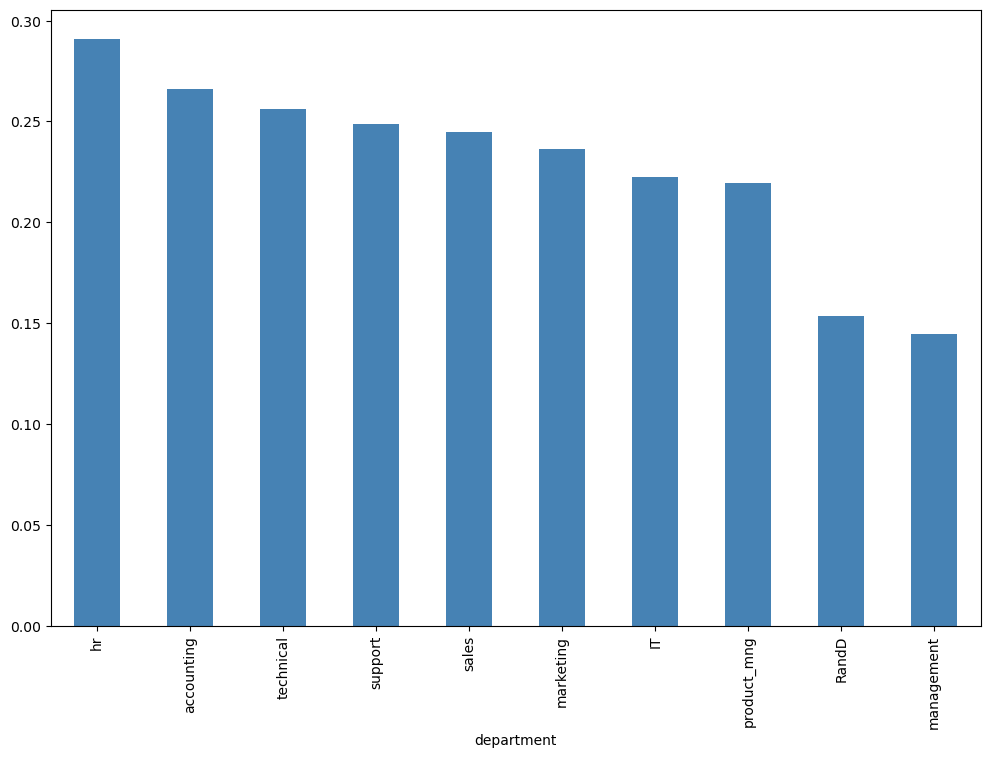

In [24]:
most_turnover_by_department= hr.groupby('department')['left'].mean().sort_values(ascending = False)
print(most_turnover_by_department)
most_turnover_by_department.plot(kind = 'bar',color = 'steelblue')
plt.show()

#### Things to notice:
- Highest Turnover: HR (29.09%), Accounting (26.60%), and Technical (25.63%) have the highest turnover rates
- Medium Turnover: Support (24.90%), Sales (24.49%), and Marketing (23.66%) also show notable attrition
- R&D and Management have a significantly lower turnover rate

## Turnover by satisfaction level

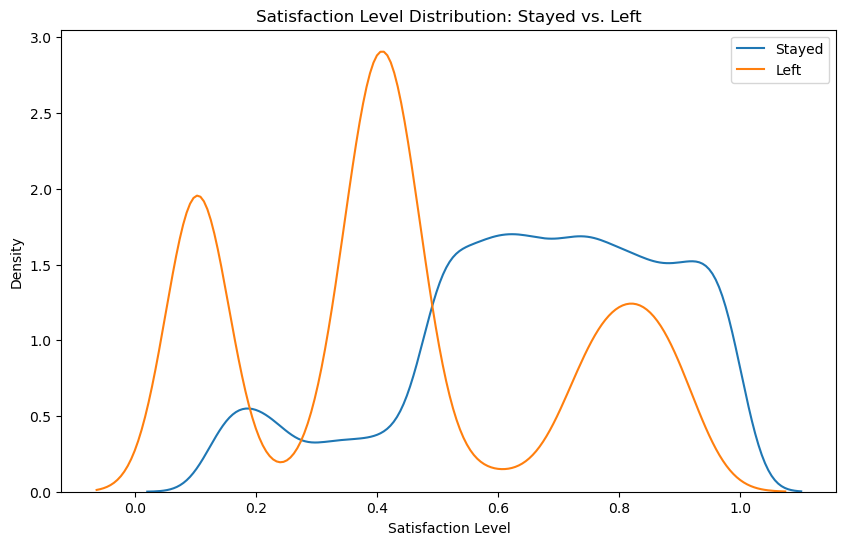

In [25]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=hr[hr['left'] == 0]['satisfaction_level'], label='Stayed')
sns.kdeplot(data=hr[hr['left'] == 1]['satisfaction_level'], label='Left')
plt.title('Satisfaction Level Distribution: Stayed vs. Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Density')
plt.legend()
plt.show()

In [26]:
print(hr[hr['left'] == 0]['satisfaction_level'].describe())
print('-'*120)
print(hr[hr['left'] == 1]['satisfaction_level'].describe())

count    11428.000000
mean         0.666810
std          0.217104
min          0.120000
25%          0.540000
50%          0.690000
75%          0.840000
max          1.000000
Name: satisfaction_level, dtype: float64
------------------------------------------------------------------------------------------------------------------------
count    3571.000000
mean        0.440098
std         0.263933
min         0.090000
25%         0.130000
50%         0.410000
75%         0.730000
max         0.920000
Name: satisfaction_level, dtype: float64


The Satisfaction Level shows 3 interesting areas:

- Employees leave the company below 0.12.
- There is a high rate of departure between 0.36 and 0.46.
- Turnover rate is higher between 0.72 and 0.92.

Employees with very low satisfaction level obviously leave the company. The risky zone is when employees rates their satisfaction just below 0.5. Employees also tend to leave the company when they become moderately satisfied.

## Turnover by last evaluation

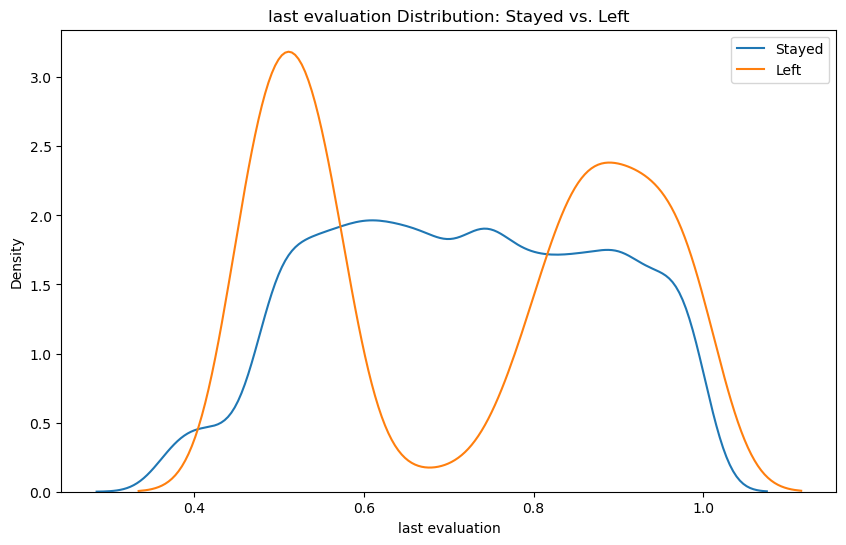

In [27]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=hr[hr['left'] == 0]['last_evaluation'], label='Stayed')
sns.kdeplot(data=hr[hr['left'] == 1]['last_evaluation'], label='Left')
plt.title('last evaluation Distribution: Stayed vs. Left')
plt.xlabel('last evaluation')
plt.ylabel('Density')
plt.legend()
plt.show()

In [28]:
print(hr[hr['left'] == 0]['last_evaluation'].describe())
print('-'*120)
print(hr[hr['left'] == 1]['last_evaluation'].describe())

count    11428.000000
mean         0.715473
std          0.162005
min          0.360000
25%          0.580000
50%          0.710000
75%          0.850000
max          1.000000
Name: last_evaluation, dtype: float64
------------------------------------------------------------------------------------------------------------------------
count    3571.000000
mean        0.718113
std         0.197673
min         0.450000
25%         0.520000
50%         0.790000
75%         0.900000
max         1.000000
Name: last_evaluation, dtype: float64


The Last Evaluation shows 2 interesting areas:

- Turnover rate is higher between 0.45 and 0.57.
- Turnover rate is higher above 0.77.


Employees who left the company actually had slightly better performance reviews on average (0.718) compared to those who stayed (0.715), with those who left also showing higher ratings in the middle range.

Those who left had more varied performance reviews, indicating a mix of higher and lower evaluations, while the ratings of those who stayed were more consistent overall.

## Turnover by number of projects

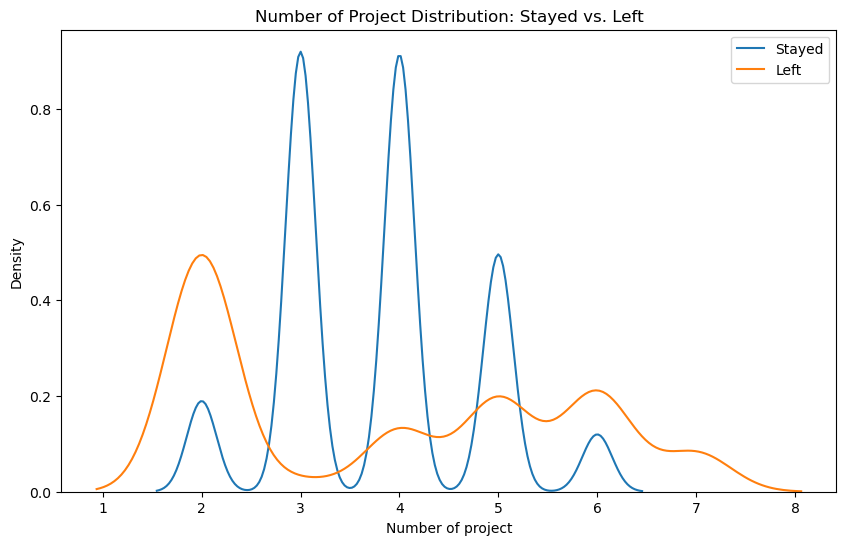

In [29]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=hr[hr['left'] == 0]['number_project'], label='Stayed')
sns.kdeplot(data=hr[hr['left'] == 1]['number_project'], label='Left')
plt.title('Number of Project Distribution: Stayed vs. Left')
plt.xlabel('Number of project')
plt.ylabel('Density')
plt.legend()
plt.show()

In [30]:
print(hr[hr['left'] == 0]['number_project'].describe())
print('-'*120)
print(hr[hr['left'] == 1]['number_project'].describe())

count    11428.000000
mean         3.786664
std          0.979884
min          2.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: number_project, dtype: float64
------------------------------------------------------------------------------------------------------------------------
count    3571.000000
mean        3.855503
std         1.818165
min         2.000000
25%         2.000000
50%         4.000000
75%         6.000000
max         7.000000
Name: number_project, dtype: float64


#### The key insight is that employees working on either just 2 projects or more than 5 projects have a higher likelihood of leaving the company.

## Turnover by Average monthly hours

In [31]:
hr['average_montly_hours']

0        157
1        262
2        272
3        223
4        159
        ... 
14994    151
14995    160
14996    143
14997    280
14998    158
Name: average_montly_hours, Length: 14999, dtype: int64

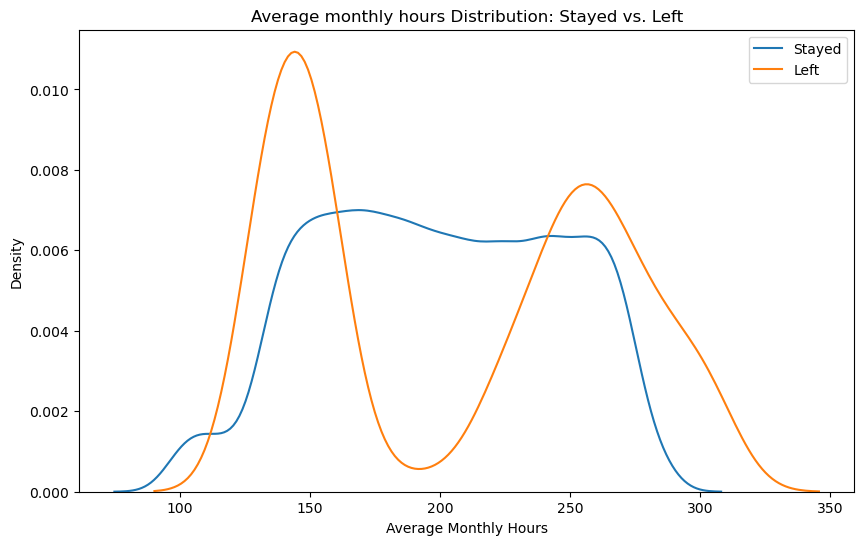

In [32]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=hr[hr['left'] == 0]['average_montly_hours'], label='Stayed')
sns.kdeplot(data=hr[hr['left'] == 1]['average_montly_hours'], label='Left')
plt.title('Average monthly hours Distribution: Stayed vs. Left')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Density')
plt.legend()
plt.show()

In [33]:
print(hr[hr['left'] == 0]['average_montly_hours'].describe())
print('-'*120)
print(hr[hr['left'] == 1]['average_montly_hours'].describe())

count    11428.000000
mean       199.060203
std         45.682731
min         96.000000
25%        162.000000
50%        198.000000
75%        238.000000
max        287.000000
Name: average_montly_hours, dtype: float64
------------------------------------------------------------------------------------------------------------------------
count    3571.000000
mean      207.419210
std        61.202825
min       126.000000
25%       146.000000
50%       224.000000
75%       262.000000
max       310.000000
Name: average_montly_hours, dtype: float64


#### This pattern indicates that both underworking and overworking employees can lead to dissatisfaction and higher turnover, whereas maintaining a balanced workload in the "safe" range significantly improves retention rates

#### Employees with really low numbers of hours per month (below 125) tend to stay in the company, whereas employees working too many hours (above 275 hours) have a high probability to leave the company. A 'safe' range is between 161 and 217 hours, which seems to be ideal to keep employees in the company.

## Turnover by time spent in company 

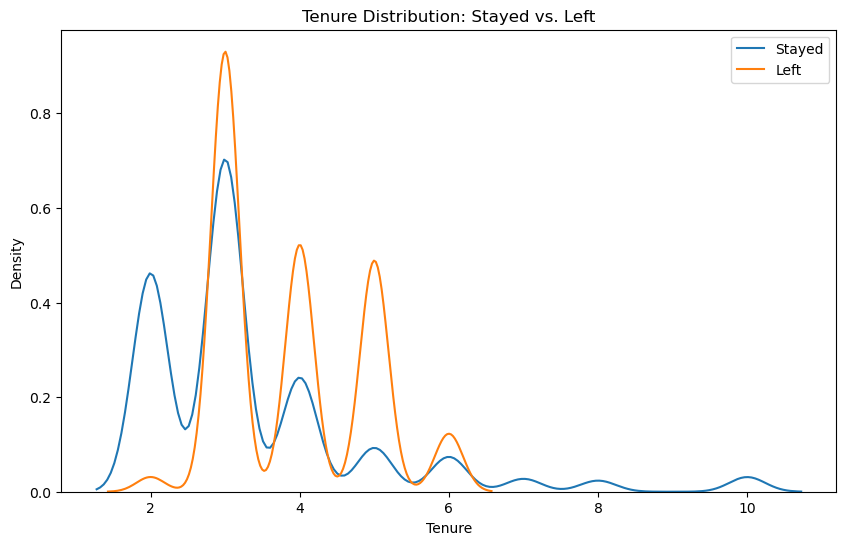

In [34]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=hr[hr['left'] == 0]['time_spend_company'], label='Stayed')
sns.kdeplot(data=hr[hr['left'] == 1]['time_spend_company'], label='Left')
plt.title('Tenure Distribution: Stayed vs. Left')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.legend()
plt.show()

In [35]:
print(hr[hr['left'] == 0]['time_spend_company'].describe())
print('-'*120)
print(hr[hr['left'] == 1]['time_spend_company'].describe())

count    11428.000000
mean         3.380032
std          1.562348
min          2.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64
------------------------------------------------------------------------------------------------------------------------
count    3571.000000
mean        3.876505
std         0.977698
min         2.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: time_spend_company, dtype: float64


#### This suggests that:
- Early tenure employees, especially those between 2 to 5 years, are more likely to leave
- Retention increases significantly for employees with longer tenure beyond 5 years

## Turnover by work accident 

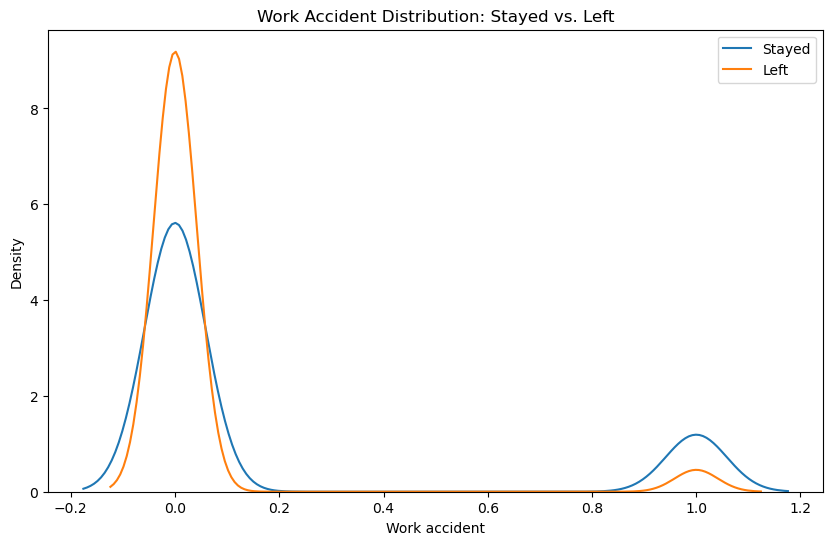

In [36]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=hr[hr['left'] == 0]['Work_accident'], label='Stayed')
sns.kdeplot(data=hr[hr['left'] == 1]['Work_accident'], label='Left')
plt.title('Work Accident Distribution: Stayed vs. Left')
plt.xlabel('Work accident')
plt.ylabel('Density')
plt.legend()
plt.show()

In [37]:
print(hr[hr['left'] == 0]['Work_accident'].describe())
print('-'*120)
print(hr[hr['left'] == 1]['Work_accident'].describe())

count    11428.000000
mean         0.175009
std          0.379991
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Work_accident, dtype: float64
------------------------------------------------------------------------------------------------------------------------
count    3571.000000
mean        0.047326
std         0.212364
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Work_accident, dtype: float64


#### Work accidents do not significantly contribute to turnover. In fact, employees with accidents seem slightly more likely to stay. A likely explanation is that organizations might offer support or incentives for employees who face accidents to retain them.

## Lets perform some group by analysis to under what are the other combined factors affecting in turnover 

In [38]:
hr.groupby(['last_evaluation','number_project'])['left'].describe()

count      mean       std  min  25%  50%  \
last_evaluation number_project                                             
0.36            2                 6.0  0.000000  0.000000  0.0  0.0  0.0   
                3                 6.0  0.000000  0.000000  0.0  0.0  0.0   
                4                 5.0  0.000000  0.000000  0.0  0.0  0.0   
                5                 2.0  0.000000  0.000000  0.0  0.0  0.0   
                6                 3.0  0.000000  0.000000  0.0  0.0  0.0   
...                               ...       ...       ...  ...  ...  ...   
1.00            2                 9.0  0.444444  0.527046  0.0  0.0  0.0   
                3                37.0  0.162162  0.373684  0.0  0.0  0.0   
                4               117.0  0.564103  0.498007  0.0  0.0  1.0   
                5               112.0  0.794643  0.405778  0.0  1.0  1.0   
                6                 8.0  0.250000  0.462910  0.0  0.0  0.0   

                                 75%  max  
last_evaluation number_project             
0.36            2               0.00  0.0  
                3               0.00  0.0  
                4               0.00  0.0  
                5               0.00  0.0  
                6               0.00  0.0  
...                              ...  ...  
1.00            2               1.00  1.0  
                3               0.00  1.0  
                4               1.00  1.0  
                5               1.00  1.0  
                6               0.25  1.0  

[355 rows x 8 columns]

#### It is clear that employees with lower evaluations and fewer projects are more likely to stay, while those with higher evaluations tend to leave, possibly in search of better opportunities. 

#### Additionally, employees who receive higher evaluations and are assigned more projects are also leaving. This indicates a need for improved workload management to help reduce turnover.

In [39]:
hr.groupby(['average_montly_hours','satisfaction_level'])['left'].describe()

count  mean  std  min  25%  50%  75%  \
average_montly_hours satisfaction_level                                         
96                   0.15                  1.0   0.0  NaN  0.0  0.0  0.0  0.0   
                     0.34                  1.0   0.0  NaN  0.0  0.0  0.0  0.0   
                     0.48                  1.0   0.0  NaN  0.0  0.0  0.0  0.0   
                     0.50                  1.0   0.0  NaN  0.0  0.0  0.0  0.0   
                     0.79                  1.0   0.0  NaN  0.0  0.0  0.0  0.0   
...                                        ...   ...  ...  ...  ...  ...  ...   
310                  0.09                  2.0   1.0  0.0  1.0  1.0  1.0  1.0   
                     0.10                  6.0   1.0  0.0  1.0  1.0  1.0  1.0   
                     0.11                  8.0   1.0  0.0  1.0  1.0  1.0  1.0   
                     0.36                  1.0   1.0  NaN  1.0  1.0  1.0  1.0   
                     0.70                  1.0   1.0  NaN  1.0  1.0  1.0  1.0   

                                         max  
average_montly_hours satisfaction_level       
96                   0.15                0.0  
                     0.34                0.0  
                     0.48                0.0  
                     0.50                0.0  
                     0.79                0.0  
...                                      ...  
310                  0.09                1.0  
                     0.10                1.0  
                     0.11                1.0  
                     0.36                1.0  
                     0.70                1.0  

[7329 rows x 8 columns]

#### Employees with lower satisfaction and higher monthly working hours are more likely to leave, and combining high satisfaction with long hours may still lead to turnover.
 
#### Employees who are working low are more likely to stay as they are comfortable and happy, does not feel to leave

In [40]:
hr.groupby(['department','salary'])['left'].describe()

count      mean       std  min  25%  50%  75%  max
department  salary                                                     
IT          high      83.0  0.048193  0.215475  0.0  0.0  0.0  0.0  1.0
            low      609.0  0.282430  0.450552  0.0  0.0  0.0  1.0  1.0
            medium   535.0  0.181308  0.385634  0.0  0.0  0.0  0.0  1.0
RandD       high      51.0  0.078431  0.271524  0.0  0.0  0.0  0.0  1.0
            low      364.0  0.151099  0.358638  0.0  0.0  0.0  0.0  1.0
            medium   372.0  0.166667  0.373180  0.0  0.0  0.0  0.0  1.0
accounting  high      74.0  0.067568  0.252716  0.0  0.0  0.0  0.0  1.0
            low      358.0  0.276536  0.447911  0.0  0.0  0.0  1.0  1.0
            medium   335.0  0.298507  0.458288  0.0  0.0  0.0  1.0  1.0
hr          high      45.0  0.133333  0.343776  0.0  0.0  0.0  0.0  1.0
            low      335.0  0.274627  0.446994  0.0  0.0  0.0  1.0  1.0
            medium   359.0  0.325905  0.469366  0.0  0.0  0.0  1.0  1.0
management  high     225.0  0.004444  0.066667  0.0  0.0  0.0  0.0  1.0
            low      180.0  0.327778  0.470713  0.0  0.0  0.0  1.0  1.0
            medium   225.0  0.137778  0.345435  0.0  0.0  0.0  0.0  1.0
marketing   high      80.0  0.112500  0.317974  0.0  0.0  0.0  0.0  1.0
            low      402.0  0.313433  0.464467  0.0  0.0  0.0  1.0  1.0
            medium   376.0  0.180851  0.385408  0.0  0.0  0.0  0.0  1.0
product_mng high      68.0  0.088235  0.285746  0.0  0.0  0.0  0.0  1.0
            low      451.0  0.232816  0.423095  0.0  0.0  0.0  0.0  1.0
            medium   383.0  0.227154  0.419541  0.0  0.0  0.0  0.0  1.0
sales       high     269.0  0.052045  0.222531  0.0  0.0  0.0  0.0  1.0
            low     2099.0  0.332063  0.471066  0.0  0.0  0.0  1.0  1.0
            medium  1772.0  0.170993  0.376609  0.0  0.0  0.0  0.0  1.0
support     high     141.0  0.056738  0.232165  0.0  0.0  0.0  0.0  1.0
            low     1146.0  0.339442  0.473727  0.0  0.0  0.0  1.0  1.0
            medium   942.0  0.167728  0.373823  0.0  0.0  0.0  0.0  1.0
technical   high     201.0  0.124378  0.330836  0.0  0.0  0.0  0.0  1.0
            low     1372.0  0.275510  0.446934  0.0  0.0  0.0  1.0  1.0
            medium  1147.0  0.256321  0.436791  0.0  0.0  0.0  1.0  1.0

#### Salary and department appear to influence turnover: Low salary employees tend to have higher turnover, while high-salary employees tend to stay longer.

#### Departments with overall higher turnover for low-salary employees include sales, support, and marketing.

#### Management and high-salary positions seem to have much lower turnover across the board.

#### You could focus on improving retention strategies for departments with high low-salary employee turnover or investigate how to adjust salary/benefits for low-salary groups to improve retention.

# These factors explain why employees quit:  
- Low Satisfaction: Employees with very low or moderate satisfaction are more likely to leave.  
- Workload Imbalance: Overworking (275+ hours) or underworking (<125 hours) increases turnover risk.  
- Stalled Careers: Early-tenure employees (2–5 years) quit due to lack of growth or promotions.  
- Project Allocation: Too few (≤2) or too many (≥6) projects lead to dissatisfaction.  
- Role-Specific Stress: HR, Accounting, and Technical roles show the highest attrition rates.  

# Lets prep our data to proceed with machine learning 

### Econcoding the categorical columns: Department and Salary

In [41]:
# Before we move forward with the enocoding and alterations, Lets take a copy of our data
df = hr.copy()

In [42]:
hr['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [43]:
#Lets replace the values to 1,2 and 3
hr['salary'] = hr['salary'].replace({'low': 1,'medium':2,'high': 3})

In [44]:
hr['salary'].unique()

array([1, 2, 3], dtype=int64)

In [45]:
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [46]:
hr= pd.get_dummies(hr, columns=['department'], drop_first=True).astype(int)

In [49]:
hr = hr.astype(int)
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0,0,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0,0,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0,0,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0,0,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,0,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0,0,2,151,3,0,1,0,1,0,0,0,0,0,0,0,1,0
14995,0,0,2,160,3,0,1,0,1,0,0,0,0,0,0,0,1,0
14996,0,0,2,143,3,0,1,0,1,0,0,0,0,0,0,0,1,0
14997,0,0,6,280,4,0,1,0,1,0,0,0,0,0,0,0,1,0


#### Now that we encoded all the categorical columns lets proceed further with the model building 

## Model Building using imbalanced target variable 

In [65]:
# Lets importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,f1_score,precision_score,recall_score,cohen_kappa_score

In [66]:
x = hr.drop('left',axis = 1)
y= hr['left']

In [67]:
# Stratified sampling to maintain the ratio of population 
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)

In [68]:
print('x train',xtrain.shape)
print('x test',xtest.shape)
print('y train',ytrain.shape)
print('y test',ytest.shape)

x train (10499, 17)
x test (4500, 17)
y train (10499,)
y test (4500,)


In [69]:
xtrain_sc = xtrain.copy()
xtest_sc = xtest.copy()

In [71]:
num = ['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

In [72]:
# Lets scale the data to one common scale
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
xtrain_sc[num] = StandardScaler.fit_transform(xtrain[num])
xtest_sc[num] = StandardScaler.transform(xtest[num])

In [87]:
# User define function for the metrics
def metrics(name,key,arg):
    print('Name of the model :',name)
    print('Precision score :',precision_score(key,arg))    
    print('Recall score :',recall_score(key,arg)) 
    print('Accuracy :', accuracy_score(key,arg))
    print('F1-Score :', f1_score(key,arg))
    print('Weighted F1-Score', f1_score(key,arg,average='weighted'))
    print('Classification report','\n',classification_report(key,arg))
    print('Cohen Kappa Score :', cohen_kappa_score(key,arg))
    print('Confusion Matrix :','\n',confusion_matrix(key,arg))

In [74]:
# User defined function for ROC - AUC curve
def curve(key,arg):
    plt.figure(figsize=(6,4))
    fpr,tpr,threshold = roc_curve(key,arg)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0 ,1.0])
    plt.ylim([0.0 , 1.0])
    print('Area under the curve:',roc_auc_score(key,arg))

# LOGISTIC REGRESSION

In [75]:
lr = LogisticRegression()
lr.fit(xtrain_sc,ytrain)
lr_pred = lr.predict(xtest_sc)
lr_pred

array([0, 1, 0, ..., 0, 0, 0])

In [76]:
a1 = round(accuracy_score(ytest,lr_pred)*100,3)
a1

75.622

In [77]:
f1 = round(f1_score(ytest,lr_pred,average='weighted')*100,3)
f1

68.031

In [88]:
metrics('Logistic Regression',ytest,lr_pred)

Name of the model : Logistic Regression
Precision score : 0.41875
Recall score : 0.06255835667600373
Accuracy : 0.7562222222222222
F1-Score : 0.10885458976441917
Weighted F1-Score 0.6803113053514462
Classification report 
               precision    recall  f1-score   support

           0       0.77      0.97      0.86      3429
           1       0.42      0.06      0.11      1071

    accuracy                           0.76      4500
   macro avg       0.59      0.52      0.48      4500
weighted avg       0.69      0.76      0.68      4500

Cohen Kappa Score : 0.050084860240379725
Confusion Matrix : 
 [[3336   93]
 [1004   67]]


Area under the curve: 0.5177183734386143


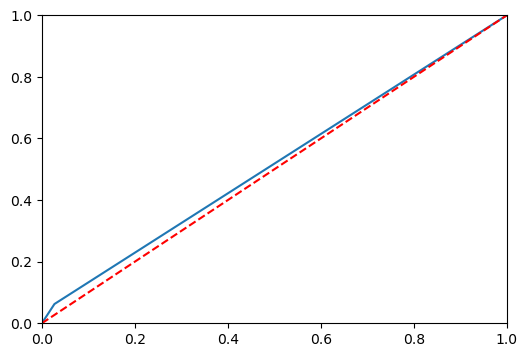

In [79]:
curve(ytest,lr_pred)

# DecisionTreeClassifier

In [80]:
dt = DecisionTreeClassifier(random_state=100)
dt.fit(xtrain_sc,ytrain)
dt_pred = dt.predict(xtest_sc)
dt_pred

array([0, 0, 0, ..., 0, 1, 0])

In [81]:
a2 = round(accuracy_score(ytest,dt_pred)*100,3)
a2

95.711

In [82]:
f2 = round(f1_score(ytest,dt_pred,average='weighted')*100,3)
f2

95.736

In [89]:
metrics('Decision Tree Classifier',ytest,dt_pred)

Name of the model : Decision Tree Classifier
Precision score : 0.8962093862815884
Recall score : 0.927170868347339
Accuracy : 0.9571111111111111
F1-Score : 0.911427260211106
Weighted F1-Score 0.9573589197144392
Classification report 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      3429
           1       0.90      0.93      0.91      1071

    accuracy                           0.96      4500
   macro avg       0.94      0.95      0.94      4500
weighted avg       0.96      0.96      0.96      4500

Cohen Kappa Score : 0.8831430522792554
Confusion Matrix : 
 [[3314  115]
 [  78  993]]


Area under the curve: 0.9468166969324914


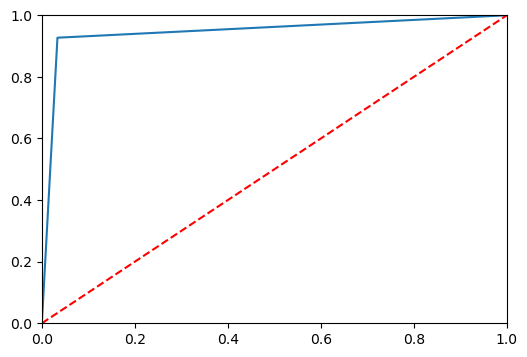

In [84]:
curve(ytest,dt_pred)

# RandomForestClassifier

In [90]:
rf = RandomForestClassifier(random_state=100)
rf.fit(xtrain_sc,ytrain)
rf_pred = rf.predict(xtest_sc)
rf_pred

array([0, 0, 0, ..., 0, 1, 0])

In [91]:
a3 = round(accuracy_score(ytest,rf_pred)*100,3)
a3

96.733

In [92]:
f3 = round(f1_score(ytest,rf_pred,average='weighted')*100,3)
f3

96.737

In [93]:
metrics('RandomForestClassifier',ytest,rf_pred)

Name of the model : RandomForestClassifier
Precision score : 0.9285714285714286
Recall score : 0.934640522875817
Accuracy : 0.9673333333333334
F1-Score : 0.9315960912052117
Weighted F1-Score 0.9673698478122266
Classification report 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3429
           1       0.93      0.93      0.93      1071

    accuracy                           0.97      4500
   macro avg       0.95      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500

Cohen Kappa Score : 0.9101396686293304
Confusion Matrix : 
 [[3352   77]
 [  70 1001]]


Area under the curve: 0.9560924982416414


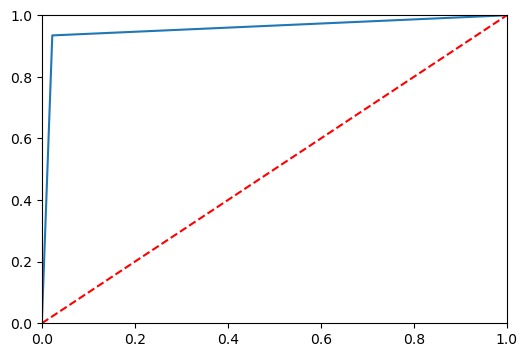

In [94]:
curve(ytest,rf_pred)

# Naive - Bayes Classifier

In [95]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain_sc,ytrain)
nb_pred = nb.predict(xtest_sc)
nb_pred

array([1, 1, 1, ..., 1, 1, 1])

In [96]:
a4 = round(accuracy_score(ytest,nb_pred)*100,3)
a4

29.889

In [97]:
f4 = round(f1_score(ytest,nb_pred,average='weighted')*100,3)
f4

21.078

In [98]:
metrics('Naive Bayes classifier- GaussianNB',ytest,nb_pred)

Name of the model : Naive Bayes classifier- GaussianNB
Precision score : 0.25272899857617465
Recall score : 0.9943977591036415
Accuracy : 0.29888888888888887
F1-Score : 0.4030274361400189
Weighted F1-Score 0.21078459440428549
Classification report 
               precision    recall  f1-score   support

           0       0.98      0.08      0.15      3429
           1       0.25      0.99      0.40      1071

    accuracy                           0.30      4500
   macro avg       0.62      0.54      0.28      4500
weighted avg       0.81      0.30      0.21      4500

Cohen Kappa Score : 0.037856313370351335
Confusion Matrix : 
 [[ 280 3149]
 [   6 1065]]


Area under the curve: 0.5380271093564285


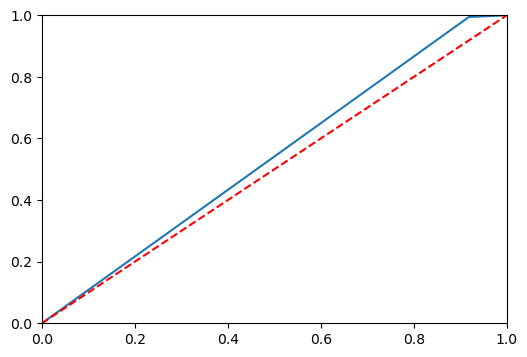

In [99]:
curve(ytest,nb_pred)

# GradientBoostingClassifier

In [100]:
gb = GradientBoostingClassifier(random_state=100)
gb.fit(xtrain_sc,ytrain)
gb_pred = gb.predict(xtest_sc)
gb_pred

array([0, 1, 0, ..., 0, 1, 0])

In [101]:
a5 = round(accuracy_score(ytest,gb_pred)*100,3)
a5

95.622

In [102]:
f5 = round(f1_score(ytest,gb_pred,average='weighted')*100,3)
f5

95.626

In [103]:
metrics('GradientBoostingClassifier',ytest,gb_pred)

Name of the model : GradientBoostingClassifier
Precision score : 0.9061338289962825
Recall score : 0.9103641456582633
Accuracy : 0.9562222222222222
F1-Score : 0.9082440614811365
Weighted F1-Score 0.9562572274467526
Classification report 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3429
           1       0.91      0.91      0.91      1071

    accuracy                           0.96      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500

Cohen Kappa Score : 0.8794977318659378
Confusion Matrix : 
 [[3328  101]
 [  96  975]]


Area under the curve: 0.9404547470781838


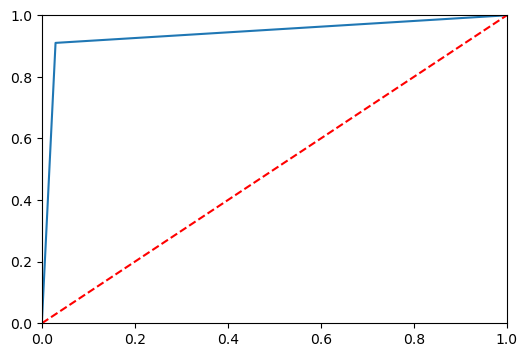

In [104]:
curve(ytest,gb_pred)

# AdaBoostClassifier

In [105]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=100)
ada.fit(xtrain_sc,ytrain)
ada_pred = ada.predict(xtest_sc)
ada_pred

array([0, 0, 0, ..., 0, 1, 0])

In [106]:
a6 = round(accuracy_score(ytest,ada_pred)*100,3)
a6

91.378

In [107]:
f6 = round(f1_score(ytest,ada_pred,average='weighted')*100,3)
f6

91.324

In [108]:
metrics('AdaBoostClassifier',ytest,ada_pred)

Name of the model : AdaBoostClassifier
Precision score : 0.8305905130687319
Recall score : 0.8011204481792717
Accuracy : 0.9137777777777778
F1-Score : 0.8155893536121673
Weighted F1-Score 0.913236716275705
Classification report 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      3429
           1       0.83      0.80      0.82      1071

    accuracy                           0.91      4500
   macro avg       0.88      0.88      0.88      4500
weighted avg       0.91      0.91      0.91      4500

Cohen Kappa Score : 0.7593488028223175
Confusion Matrix : 
 [[3254  175]
 [ 213  858]]


Area under the curve: 0.8750425804617561


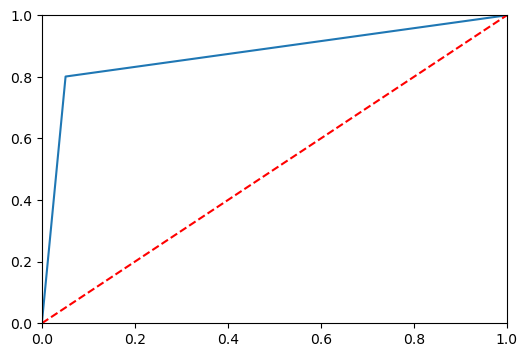

In [109]:
curve(ytest,ada_pred)

# XGBClassifier

In [110]:
xg = XGBClassifier(random_state=100)
xg.fit(xtrain_sc,ytrain)
xg_pred = xg.predict(xtest_sc)
xg_pred

array([0, 0, 0, ..., 0, 1, 0])

In [111]:
a7 = round(accuracy_score(ytest,xg_pred)*100,3)
a7

96.311

In [112]:
f7 = round(f1_score(ytest,xg_pred,average='weighted')*100,3)
f7

96.318

In [113]:
metrics('XGBClassifier',ytest,xg_pred)

Name of the model : XGBClassifier
Precision score : 0.9178208679593721
Recall score : 0.9281045751633987
Accuracy : 0.9631111111111111
F1-Score : 0.9229340761374188
Weighted F1-Score 0.9631815353617224
Classification report 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      3429
           1       0.92      0.93      0.92      1071

    accuracy                           0.96      4500
   macro avg       0.95      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500

Cohen Kappa Score : 0.8986873295688963
Confusion Matrix : 
 [[3340   89]
 [  77  994]]


Area under the curve: 0.9510747431080919


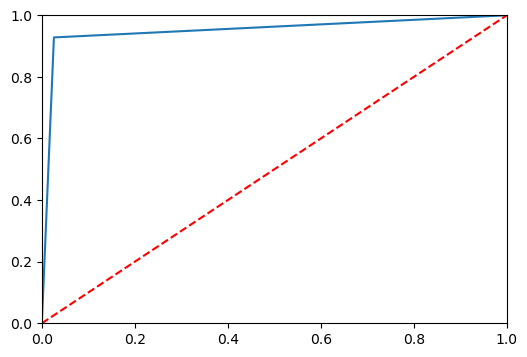

In [114]:
curve(ytest,xg_pred)

#### We were able to reach a impressive score of 97% using randomforest classifier, Lets try building some models using hyperparameter

# TUNED MODELS

## Lets perform fine tuning using RandomSearchCV for the best performing models such as:

### DecisionTreeClassifier

### Random Forest Classifier

### Gradient Boost

### Xgboost

## TUNED DecisionTree Classifier

In [115]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(estimator=dt, param_distributions = param_grid,cv= 5 ,random_state=42)

random_search.fit(xtrain_sc,ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42)

In [116]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [117]:
best_params

{'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 10,
 'criterion': 'gini'}

In [118]:
best_model

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, random_state=100)

In [120]:
dt_tunned = DecisionTreeClassifier(criterion= 'gini',max_depth=10, min_samples_leaf=2, min_samples_split=2,random_state=100)
dt_tunned.fit(xtrain_sc,ytrain)
dt_tunned_pred = dt_tunned.predict(xtest_sc)
dt_tunned_pred

array([0, 1, 0, ..., 0, 1, 0])

In [121]:
a8 = round(accuracy_score(ytest,dt_tunned_pred)*100,3)
a8

95.689

In [122]:
f8 = round(f1_score(ytest,dt_tunned_pred,average='weighted')*100,3)
f8

95.697

In [123]:
metrics('Tunned DecisionTree classifier',ytest,dt_tunned_pred)

Name of the model : Tunned DecisionTree classifier
Precision score : 0.9048938134810711
Recall score : 0.9150326797385621
Accuracy : 0.9568888888888889
F1-Score : 0.9099350046425254
Weighted F1-Score 0.9569711919287598
Classification report 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3429
           1       0.90      0.92      0.91      1071

    accuracy                           0.96      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500

Cohen Kappa Score : 0.8815984453997945
Confusion Matrix : 
 [[3326  103]
 [  91  980]]


Area under the curve: 0.9424973839054431


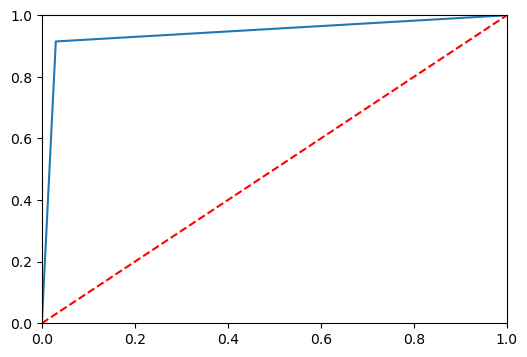

In [124]:
curve(ytest,dt_tunned_pred)

# Tuned Random Forest Classifier

In [125]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions = param_grid,cv= 5 ,random_state=42)

random_search.fit(xtrain_sc,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
                   param_distributions={'max_depth': [5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 150, 200]},
                   random_state=42)

In [126]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [127]:
best_params

{'n_estimators': 150,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 20}

In [128]:
best_model

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=150, random_state=100)

In [129]:
rf_tunned = RandomForestClassifier(n_estimators = 150 ,max_depth=20, min_samples_leaf=2, min_samples_split=10,random_state=100)
rf_tunned.fit(xtrain_sc,ytrain)
rf_tunned_pred = rf.predict(xtest_sc)
rf_tunned_pred

array([0, 0, 0, ..., 0, 1, 0])

In [130]:
a9 = round(accuracy_score(ytest,rf_tunned_pred)*100,3)
a9

96.733

In [131]:
f9 = round(f1_score(ytest,rf_tunned_pred,average='weighted')*100,3)
f9

96.737

In [132]:
metrics('Tunned Random Forest classifier',ytest,rf_tunned_pred)

Name of the model : Tunned Random Forest classifier
Precision score : 0.9285714285714286
Recall score : 0.934640522875817
Accuracy : 0.9673333333333334
F1-Score : 0.9315960912052117
Weighted F1-Score 0.9673698478122266
Classification report 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3429
           1       0.93      0.93      0.93      1071

    accuracy                           0.97      4500
   macro avg       0.95      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500

Cohen Kappa Score : 0.9101396686293304
Confusion Matrix : 
 [[3352   77]
 [  70 1001]]


Area under the curve: 0.9560924982416414


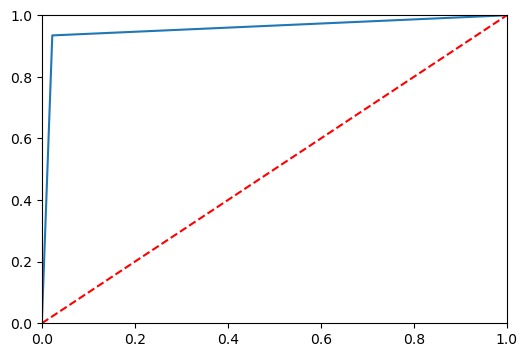

In [133]:
curve(ytest,rf_tunned_pred)

# TUNED Gradient Boost

In [134]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7] }

random_search = RandomizedSearchCV(estimator=gb, param_distributions = param_grid, cv=5, scoring='accuracy')

random_search.fit(xtrain_sc, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=100),
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 150]},
                   scoring='accuracy')

In [135]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [136]:
best_params

{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}

In [137]:
best_model

GradientBoostingClassifier(max_depth=5, random_state=100)

In [148]:
gb_tuned = GradientBoostingClassifier(n_estimators=100,learning_rate = 0.1, max_depth = 5, random_state=100)
gb_tuned.fit(xtrain_sc,ytrain)
gb_tuned_pred = gb_tuned.predict(xtest_sc)
gb_tuned_pred

array([0, 1, 0, ..., 0, 1, 0])

In [149]:
a10 = round(accuracy_score(ytest,gb_tuned_pred)*100,3)
a10

96.089

In [150]:
f10 = round(f1_score(ytest,gb_tuned_pred,average='weighted')*100,3)
f10

96.095

In [151]:
metrics('Tunned Gradient Boosting classifier',ytest,gb_tuned_pred)

Name of the model : Tunned Gradient Boosting classifier
Precision score : 0.913968547641073
Recall score : 0.9225023342670402
Accuracy : 0.9608888888888889
F1-Score : 0.9182156133828997
Weighted F1-Score 0.9609512038355976
Classification report 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      3429
           1       0.91      0.92      0.92      1071

    accuracy                           0.96      4500
   macro avg       0.94      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500

Cohen Kappa Score : 0.8925154081605233
Confusion Matrix : 
 [[3336   93]
 [  83  988]]


Area under the curve: 0.9476903622341325


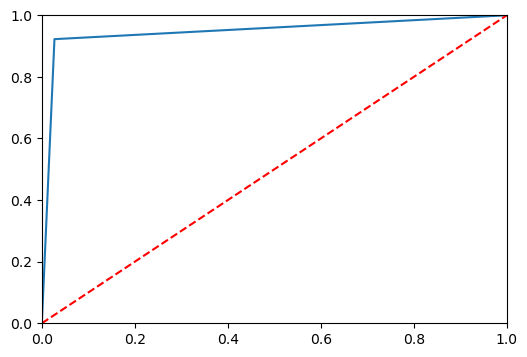

In [152]:
curve(ytest,gb_tuned_pred)

# TUNED XGBOOST

In [143]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 150],
    'max_depth': [3, 5, 7],
                        }

random_search = RandomizedSearchCV(estimator= xg, param_distributions = param_grid, cv=5, scoring='accuracy')

random_search.fit(xtrain_sc, ytrain)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=100, ...),
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 150]},
                   scoring='accuracy')

In [144]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [145]:
best_params

{'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1}

In [146]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [153]:
xg_tuned = XGBClassifier(learning_rate = 0.1,max_depth=7, n_estimators = 100,random_state=100)
xg_tuned.fit(xtrain_sc,ytrain)
xg_tuned_pred = xg_tuned.predict(xtest_sc)
xg_tuned_pred

array([0, 1, 0, ..., 0, 1, 0])

In [154]:
a11 = round(accuracy_score(ytest,xg_tuned_pred)*100,3)
a11

96.156

In [155]:
f11 = round(f1_score(ytest,xg_tuned_pred,average='weighted')*100,3)
f11

96.162

In [156]:
metrics('Tunned XG Boosting classifier',ytest,xg_tuned_pred)

Name of the model : Tunned XG Boosting classifier
Precision score : 0.9149722735674677
Recall score : 0.9243697478991597
Accuracy : 0.9615555555555556
F1-Score : 0.9196470041802136
Weighted F1-Score 0.9616228834458913
Classification report 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      3429
           1       0.91      0.92      0.92      1071

    accuracy                           0.96      4500
   macro avg       0.95      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500

Cohen Kappa Score : 0.8943813310150137
Confusion Matrix : 
 [[3337   92]
 [  81  990]]


Area under the curve: 0.9487698841566374


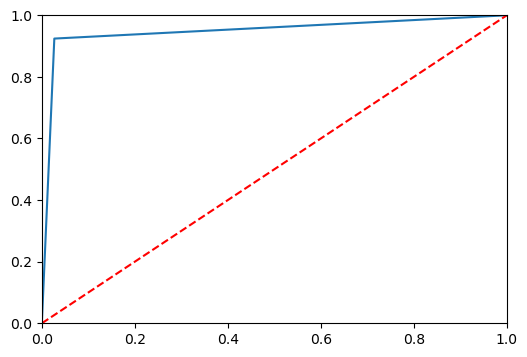

In [157]:
curve(ytest,xg_tuned_pred)

In [158]:
data = {'Models': ['Logistic Regression', 'Decision Tree Classifier',
                   'Random Forest Classifier', 'Naive Bayes Classifier',
                   'Gradient Boosting Classifier', 'Ada Boosting Classifier',
                   'XGBoost Classifier', 'Tuned Decision Tree Classifier',
                   'Tuned Random Forest Classifier', 'Tuned Gradient Boost',
                   'Tuned XGBoost Classifier'],
        'Accuracy': [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11],
        'Weighted F1_score': [f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11]}

model_comparison_df = pd.DataFrame(data).sort_values(by = ['Accuracy','Weighted F1_score'],ascending=False,ignore_index=True)

model_comparison_df

,Models,Accuracy,Weighted F1_score
0,Random Forest Classifier,96.733,96.737
1,Tuned Random Forest Classifier,96.733,96.737
2,XGBoost Classifier,96.311,96.318
3,Tuned XGBoost Classifier,96.156,96.162
4,Tuned Gradient Boost,96.089,96.095
5,Decision Tree Classifier,95.711,95.736
6,Tuned Decision Tree Classifier,95.689,95.697
7,Gradient Boosting Classifier,95.622,95.626
8,Ada Boosting Classifier,91.378,91.324
9,Logistic Regression,75.622,68.031


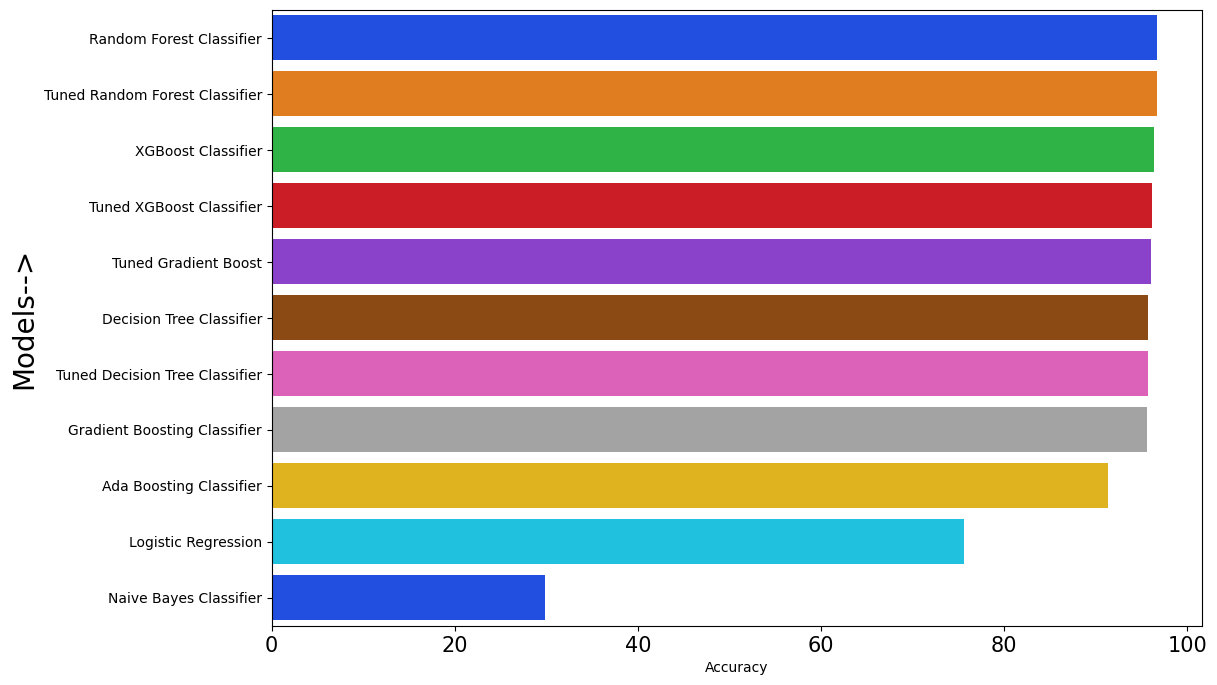

In [162]:
sns.barplot(x=model_comparison_df['Accuracy'],y=model_comparison_df['Models'],palette='bright')
plt.ylabel('Models-->',fontsize= 20)
plt.xticks(fontsize = 15)
plt.show()

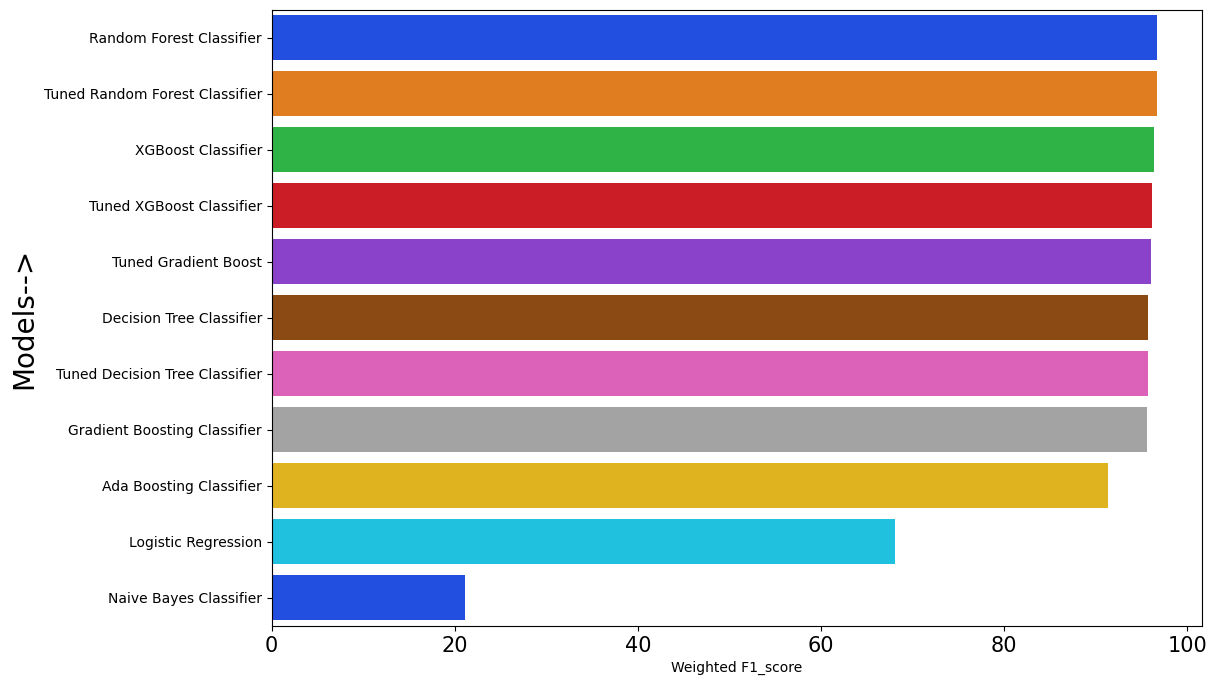

In [163]:
sns.barplot(x=model_comparison_df['Weighted F1_score'],y=model_comparison_df['Models'],palette='bright')
plt.ylabel('Models-->',fontsize= 20)
plt.xticks(fontsize = 15)
plt.show()

## Conclusion:

This project analyzed various machine learning models to predict employee turnover and understand the factors contributing to it. Ensemble models like Random Forest and XGBoost demonstrated the highest predictive accuracy and reliability (~96.7%), confirming their suitability for this problem. Interestingly, hyperparameter tuning for some models provided minimal performance improvement, underscoring the robustness of default parameters in specific algorithms. The results emphasize the importance of advanced modeling techniques for solving complex business problems while revealing actionable insights about workforce behavior.

## Business Interpretation and Recommendations:
Key Insights:

Employees with low satisfaction levels, excessive workloads (average monthly hours), or inadequate evaluation processes are more likely to leave.
Departments with lower salary bands, such as support and sales, face higher turnover rates.
Overperformers (high evaluations and multiple projects) might leave due to burnout or better opportunities elsewhere.
Actionable Improvements:

Satisfaction Level: Initiate periodic employee satisfaction surveys to gauge engagement and address dissatisfaction proactively.

Workload Management: Implement fair workload distribution policies to prevent burnout, particularly for employees handling high project volumes.

Salary Adjustments: Reassess salary structures, especially for high-turnover departments, to align with industry benchmarks and retain valuable talent.

Career Growth Opportunities: Provide recognition, skill development programs, and promotions for high performers to deter them from seeking external opportunities.

Streamlined Evaluations: Ensure regular and constructive evaluations that accurately reflect employee contributions without overburdening them.

By focusing on these areas, the organization can effectively lower turnover rates, enhance employee satisfaction, and foster long-term loyalty, ultimately contributing to improved organizational efficiency and reduced hiring costs.